# First Exploration Plots

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

X_train_window_size_5 = pd.read_csv('../Data/X_train_window_size_5_time_encoding_True.csv')
y_train_window_size_5 = pd.read_csv('../Data/y_train_window_size_5_time_encoding_True.csv')

In [19]:
X_train_window_size_5["5"].max()

1860.0

In [20]:
X_train_window_size_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_hours             91512 non-null  float64
 1   dlvry_weekend           91512 non-null  float64
 2   dlvry_bank_holiday      91512 non-null  float64
 3   dlvry_day_sin           91512 non-null  float64
 4   dlvry_day_cos           91512 non-null  float64
 5   dlvry_weekday_sin       91512 non-null  float64
 6   dlvry_weekday_cos       91512 non-null  float64
 7   dlvry_hour_sin          91512 non-null  float64
 8   dlvry_hour_cos          91512 non-null  float64
 9   lasttrade_weekend       91512 non-null  float64
 10  lasttrade_bank_holiday  91512 non-null  float64
 11  lasttrade_day_sin       91512 non-null  float64
 12  lasttrade_day_cos       91512 non-null  float64
 13  lasttrade_weekday_sin   91512 non-null  float64
 14  lasttrade_weekday_cos   91512 non-null

Renaming Columns

In [21]:
labels = ["open", "high", "low", "close", "volume", "minutes"]
new_cols = list(X_train_window_size_5.columns[:17])
for i in range(4, 0, -1):
    for label in labels:
        new_cols.append(label+f"_{i}_{i-1}")

X_train_window_size_5_original = X_train_window_size_5.copy()
X_train_window_size_5.columns = new_cols

In [22]:
X_train_window_size_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_hours             91512 non-null  float64
 1   dlvry_weekend           91512 non-null  float64
 2   dlvry_bank_holiday      91512 non-null  float64
 3   dlvry_day_sin           91512 non-null  float64
 4   dlvry_day_cos           91512 non-null  float64
 5   dlvry_weekday_sin       91512 non-null  float64
 6   dlvry_weekday_cos       91512 non-null  float64
 7   dlvry_hour_sin          91512 non-null  float64
 8   dlvry_hour_cos          91512 non-null  float64
 9   lasttrade_weekend       91512 non-null  float64
 10  lasttrade_bank_holiday  91512 non-null  float64
 11  lasttrade_day_sin       91512 non-null  float64
 12  lasttrade_day_cos       91512 non-null  float64
 13  lasttrade_weekday_sin   91512 non-null  float64
 14  lasttrade_weekday_cos   91512 non-null

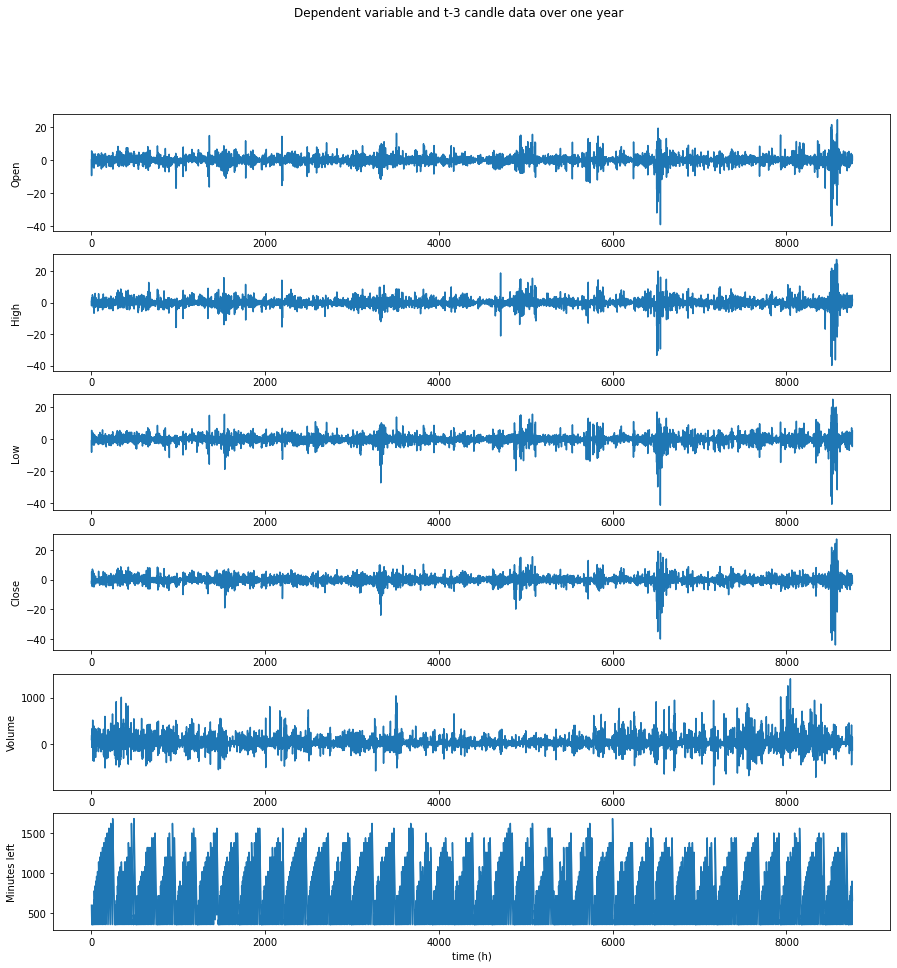

In [23]:
import numpy as np
#ylim = len(y_train_window_size_5)
ylim = 24*365
x1 = np.linspace(0, ylim, num=ylim)

cols = [*range(6)]
labels = ["Open", "High", "Low", "Close", "Volume", "Minutes left"]
ys = []
count = 0
df_plot = X_train_window_size_5_original.copy().iloc[:(24*365), :]
for col in cols:
    ys.append(df_plot[str(col)])
    count += 1


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15,15))
fig.suptitle('Dependent variable and t-3 candle data over one year')


ax1.plot(x1, ys[0])
ax1.set_ylabel(labels[0])

ax2.plot(x1, ys[1])
ax2.set_ylabel(labels[1])

ax3.plot(x1, ys[2])
ax3.set_ylabel(labels[2])

ax4.plot(x1, ys[3])
ax4.set_ylabel(labels[3])

ax5.plot(x1, ys[4])
ax5.set_ylabel(labels[4])

ax6.plot(x1, ys[5])
ax6.set_ylabel(labels[5])

ax6.set_xlabel('time (h)')

plt.show()

What exactly do we need?  
* A time-series where